In [1]:
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

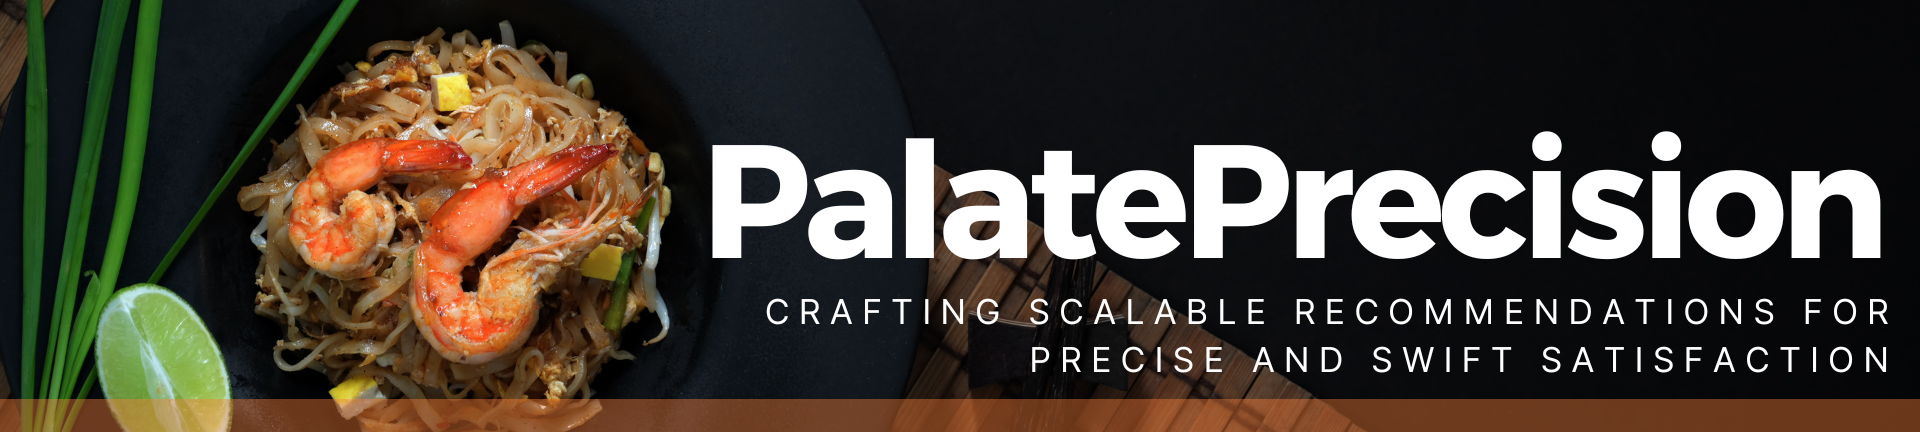

Yelp is a US based company founded in 2004 that hosts business information and crowd sourced reviews for businesses and customers to better find each other. They have been able to expand internationally in 2012 to Europe and Asia, and as of 2021 host 244.4 million reviews and 46 million unique visitors. 

Retrieved from (March 15, 2024): https://en.wikipedia.org/wiki/Yelp

#
<div style='display: flex; justify-content: space-between; align-items: center; background-color:#08312e; color: white; padding: 6px; width: 100%;'>
    <h3 style='font-weight: bold; font-size: 25px;'>ABSTRACT</h3>
    <img src="Yelp-Logo-Refresh.gif" style='height: 55px; width: auto; margin-left: auto;'>
</div>
<div style='height: 3px; background-color: #ff8c00; width: 100%;'></div><div style='height: 3px; background-color: #ff8c00; width: 100%;'></div>

This study presents a neighborhood-based collaborative filtering recommendation system tailored for restaurant recommendations. **Focused on enhancing both the relevance and speed of recommendations, the methodology integrates advanced data filtering, clustering techniques, and the use of collaborative filtering algorithms**. Data preparation involved isolating restaurant businesses in California and excluding non-restaurant establishments. Businesses and users were then clustered based on business tags and rating frequencies, respectively, employing CountVectorizer, Non-negative Matrix Factorization (NMF), and Ward's Linkage, resulting in seven business categories and nine resultant user clusters. The recommendation system was implemented using the Surprise package, testing latent factor-based, user-based, and item-based collaborative filtering algorithms, each previously hyperparameter-tuned. Evaluation metrics included precision, RMSE, and fitting time, comparing an exhaustive approach against a cluster filtering approach to achieve faster recommendations. The cluster filtering approach proved to significantly reduce recommendation time without sacrificing significant accuracy. The user-based collaborative filtering algorithm emerged as the superior choice for generating fast and relevant restaurant recommendations. This is demonstrated by its **0.81 precision, 0.94 average NDCG@10, and mere 0.07 second fit time.**

This approach was exemplified through the generation of personalized restaurant recommendations for a randomly selected user, demonstrating the system's practical applicability and effectiveness.

<div style='display: block; background-color:#08312e; color: white; padding: 6px; width: 100%;'>
    <div style='display: flex; justify-content: space-between; align-items: center;'>
        <h3 style='font-weight: bold; font-size: 25px;'>PROBLEM STATEMENT</h3>
    </div>
</div>
<div style='height: 3px; background-color: #ff8c00; width: 100%;'></div>

*How long are you willing to wait?* According to a Facebook study, the average online attention span is 2 seconds [1]. What does this mean to your digital business? You only have 2 seconds to catch your customer's attention, or you will lose the competition. If we can be more stringent than that, you only have 0.1 seconds to ensure an instantaneous user experience [2]. Any fraction of a second will cause the user to perceive system lag. With such limited time to make an impact, tailored recommendations are essential. Given these findings, our study is driven by this question: **how can we deliver recommendations that are both fast and relevant?**

#
<div style='display: block; background-color:#08312e; color: white; padding: 6px; width: 100%;'>
    <div style='display: flex; justify-content: space-between; align-items: center;'>
        <h3 style='font-weight: bold; font-size: 25px;'>MOTIVATION</h3>
    </div>
</div>
<div style='height: 3px; background-color: #ff8c00; width: 100%;'></div>

In the era of digital information overload, the quest for personalized and timely recommendations has never been more critical, particularly in the dynamic and expansive realm of restaurant choices. With the abundance of dining options available, especially in culturally rich and diverse areas like California, users, and businesses face the challenge of connecting in meaningful and relevant ways. This project is motivated by the imperative need to bridge this gap, harnessing the power of neighborhood-based collaborative filtering to swiftly deliver highly personalized restaurant recommendations. By meticulously filtering data to focus on regional preferences and employing advanced clustering techniques to understand user behaviors and preferences, this study aims not just to navigate but to streamline the vast culinary landscape. This effort reflects a broader commitment to enhancing user experience, demonstrating how targeted data science approaches can transform how we discover and engage with dining options, making every recommendation not just a suggestion but a step towards a more connected and satisfying culinary journey.


Yelp operates within a competitive landscape as a platform for business advertising and reviews, facing challenges in servicing client businesses effectively. **The study aims to create fast and relevant recommendations for Yelp users to boost interactions, providing Yelp with a market advantage.**


#
<div style='display: block; background-color:#08312e; color: white; padding: 6px; width: 100%;'>
    <div style='display: flex; justify-content: space-between; align-items: center;'>
        <h3 style='font-weight: bold; font-size: 25px;'>METHODOLOGY OVERVIEW</h3>
    </div>
</div>
<div style='height: 3px; background-color: #ff8c00; width: 100%;'></div>

The tables below display the methodology, which details the implementation plan of the study in order to answer the problem statement presented.

<center><b>Table 1A. Preprocessing</b></center>

<table>
    <thead>
        <tr style="background-color: #2e706d; color: white;">
            <th>Stage: 1</th>
            <th>Step</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Data Collection</td>
            <td></td>
            <td>Retrieve files from Kaggle and load Yelp Businesses and Yelp User Reviews datasets.</td>
        </tr>
        <tr>
            <td>Data Preparation</td>
            <td></td>
            <td>The initial data sets, comprising various business types, was filtered to include only restaurants in California.</td>
        </tr>
        <tr>
            <td>Data Cleaning and Pre-processing</td>
            <td></td>
            <td>Handle missing data and duplicates</td>
        </tr>
        <tr>
            <td>Identify Business Clusters</td>
            <td>I. Bag-of-Words</td>
            <td>Using business tags, use CountVectorizer to create a bag-of-words matrix</td>
        </tr>
        <tr>
            <td></td>
            <td>II. Dimensionality Reduction</td>
            <td>Convert the BoW matrix to a dimension-reduced matrix using NMF, identifying the optimal number of components in the process</td>
        </tr>
        <tr>
            <td></td>
            <td>III. Agglomerative Clustering</td>
            <td>Using the NMF matrix, identify the optimal distance threshold using Ward's Linkage and predict clusters</td>
        </tr>
        <tr>
            <td>Identify User Clusters</td>
            <td>I. Filter and Merge</td>
            <td>Merge business cluster labels with the user reviews table.</td>
        </tr>
        <tr>
            <td></td>
            <td>II. Count User-Business Cluster Frequency</td>
            <td>Create a pivot table that measures the count of reviews by user and business cluster.</td>
        </tr>
        <tr>
            <td></td>
            <td>III. Agglomerative Clustering</td>
            <td>Using the pivot matrix, identify the optimal distance threshold using Ward's Linkage and predict clusters.</td>
        </tr>
        <tr>
            <td>Cluster EDA</td>
            <td></td>
            <td>With the user clusters, interpret the results and label the user clusters</td>
        </tr>
    </tbody>
</table>

<center><b>Table 1B. Recommendation System Development and Evaluation</b></center>

<table>
    <thead>
        <tr style="background-color: #2e706d; color: white;">
            <th>Stage: 2</th>
            <th>Step</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Exhaustive Approach</td>
            <td></td>
            <td>Cross-validate various collaborative filtering algorithms on the full dataset.</td>
        </tr>
        <tr>
            <td>Cluster Filtering Approach</td>
            <td></td>
            <td>Cross-validate iteratively on one slice (user group) of the full dataset at a time.</td>
        </tr>
        <tr>
            <td>Evaluation</td>
            <td></td>
            <td>Compare the performance of each model and approach combination using precision, RMSE, NDCG, and fit time.</td>
        </tr>
        <tr>
            <td>Generate Recommendations</td>
            <td></td>
            <td>Example implementation illustrated the process for a randomly selected user.</td>
        </tr>
        <tr>
            <td>Conclusion and Recommendations</td>
            <td></td>
            <td>Discussion regarding the practicality of this approach and its performance in the broader context of recommender systems.</td>
        </tr>
        <tr>
            <td>Appendix</td>
            <td></td>
            <td>Hyperparameter tuning of the collaborative filtering algorithms.</td>
        </tr>
    </tbody>
</table>


#
<div style='display: block; background-color:#08312e; color: white; padding: 6px; width: 100%;'>
    <div style='display: flex; justify-content: space-between; align-items: center;'>
        <h3 style='font-weight: bold; font-size: 25px;'>DATA OVERVIEW</h3>
    </div>
</div>
<div style='height: 3px; background-color: #ff8c00; width: 100%;'></div>

The Yelp dataset features a curated selection of business, review, and user information from eight metropolitan areas across the USA and Canada, with this study specifically focusing on California.



Each monthly file name in the Customs Imports table contains the following columns.

<br>
<center> <b>Table 2. Yelp Business Dataset Overview</b> </center>
<center>Source: yelp_academic_dataset_business.json</center>
<center>


<table>
    <thead>
        <tr style="background-color: #2e706d; color: white;"> <!-- You can change #FFD700 to any color code -->
            <th>Column Name</th>
            <th>Description</th>
            <th>Data Type</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>business_id</td>
            <td>Unique Key of the table, identifier for a business</td>
            <td>string</td>
        </tr>
        <tr>
            <td>name</td>
            <td>Name of the business</td>
            <td>string</td>
        </tr>
        <tr>
            <td>categories</td>
            <td>Tags describing the business, comma-separated and self-declared by the business</td>
            <td>string</td>
        </tr>
        <tr>
            <td>state</td>
            <td>US state of business location</td>
            <td>string</td>
        </tr>
        <tr>
            <td>...</td>
            <td>Other columns include rating, longitude, latitude, ZIP Code, hours, etc.</td>
            <td>Various</td>
        </tr>
    </tbody>
</table>

<center><b>Table 3. Yelp User Reviews Overview</b></center>
<center>Source: yelp_reviews.txt</center>
<table align="center">
<thead style="background-color: #2e706d; color: white;">
<tr>
<th>Column Name</th>
<th>Description</th>
<th>Data Type</th>
</tr>
</thead>
<tbody>
<tr>
<td>user_id</td>
<td>Identifier of the user providing the review.</td>
<td>string</td>
</tr>
<tr>
<td>business_id</td>
<td>Identifier of the business being reviewed.</td>
<td>string</td>
</tr>
<tr>
<td>review_id</td>
<td>Unique identifier of the review.</td>
<td>string</td>
</tr>
<tr>
<td>...</td>
<td>Other columns such as date, stars, funny, etc.</td>
<td>list of strings</td>
</tr>
</tbody>
</table>

#
<div style='display: flex; justify-content: space-between; align-items: center; background-color: #08312e; color: white; padding: 6px; width: 100%;'>
    <h3 style='font-weight: bold; font-size: 25px;'>PART 1: Preprocessing</h3>
</div>
<div style='height: 3px; background-color: #ff8c00; width: 100%;'></div>

## 
<div style="background-color: #f0f0f0; padding: 10px;">
    <h2 style="color: navy;">A. Load Libraries and Custom Functions</h2>
</div>

In [5]:
# Import libraries
import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go
from bs4 import BeautifulSoup
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from scipy.spatial.distance import cityblock, euclidean
from sklearn.base import clone
from sklearn.cluster import (AgglomerativeClustering, DBSCAN, KMeans,
                             OPTICS, cluster_optics_dbscan)
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer)
from sklearn.metrics import (adjusted_mutual_info_score, adjusted_rand_score,
                             calinski_harabasz_score, confusion_matrix,
                             davies_bouldin_score, silhouette_score)
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import HTML
import fastcluster
from scipy.spatial.distance import cosine
from surprise import Reader, Dataset, KNNWithMeans, accuracy, SVD, KNNBasic
from surprise.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from surprise.model_selection import train_test_split
from IPython.display import display, Markdown
from sklearn.metrics import precision_score
from collections import defaultdict
# Store custom functions


def top_terms_per_cat(V, top_n, feature_names_out):
    """
    Identify the top N terms for each category in a matrix V.

    Parameters:
    - V (np.array): Matrix where each row corresponds to a category and each
    column to a term's importance.
    - top_n (int): Number of top terms to return for each category.
    - feature_names_out (np.array): Array of term names corresponding to
    columns in V.

    Returns:
    - list of np.array: A list where each element is an array of the top N terms
    for a respective category.
    """
    top_terms = []
    for topic in V:
        top_idx = topic.argsort()[-top_n:][::-1]
        terms = feature_names_out[top_idx]
        top_terms.append(terms)
    return top_terms


def reconstruction_error(n_components, lzd_bow_tfidf, title):
    """
    Plot the reconstruction error of NMF models with different numbers of
    components.

    Parameters:
    - n_components (list of int): Different numbers of components to evaluate.
    - lzd_bow_tfidf (np.array): The data matrix to be decomposed.
    - title (str): Title for the plot.
    """
    errors = []
    for n_component in n_components:
        nmf_ = NMF(n_component, max_iter=1000)
        nmf_.fit(lzd_bow_tfidf)
        errors.append(nmf_.reconstruction_err_)
    plt.figure(figsize=(12, 6))
    plt.plot(n_components, errors, '-', color='#0E4C92', marker='.')
    plt.xticks(range(min(n_components), max(n_components) + 1, 2))
    plt.title(title)
    plt.xlabel(r'$n_{components}$')
    plt.ylabel('Reconstruction Error')
    plt.grid(axis='x', lw=0.5, alpha=0.5)
    plt.show()


def silhouette_score_plot(n_components, bow, title):
    """
    Plot silhouette scores for different numbers of NMF components.

    Parameters:
    - n_components (list of int): Different numbers of components to test.
    - bow (np.array): Bag-of-words or TF-IDF matrix of the data.
    - title (str): Title for the plot.
    """
    silhouette_scores = []
    for n in n_components:
        nmf_ = NMF(n_components=n, max_iter=1000)
        W = nmf_.fit_transform(bow)
        cluster_labels = nmf_.transform(bow).argmax(axis=1)
        silhouette_avg = silhouette_score(bow, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    max_score = max(silhouette_scores)

    plt.figure(figsize=(12, 6))
    plt.xlabel('Number of Components')
    plt.ylabel('Silhouette Score')
    plt.title(title)
    plt.grid(True, axis='x', linestyle='--', linewidth=0.5,
             alpha=0.5)
    plt.axvline(7, c='orange')
    plt.plot(n_components, silhouette_scores, '-',
             color='#0E4C92', marker='.')
    plt.show()


def customer_segment_heatmap(X, user_clusters, df_count_norm, cluster_names,
                             title):
    """
    Create a heatmap visualizing the centroid values of user clusters across
    business clusters.

    Parameters:
    - X (np.array): Dataset containing user features.
    - user_clusters (np.array): Array indicating the cluster each user belongs
         to.
    - df_count_norm (pd.DataFrame): DataFrame with normalized counts for
         business clusters.
    - cluster_names (list of str): Names of user clusters.
    - title (str): Title for the heatmap.
    """
    centroids = []
    for cluster in set(user_clusters):
        points_in_cluster = X[user_clusters == cluster]
        centroid = np.mean(points_in_cluster, axis=0)
        centroids.append(centroid)

    df_centroids = pd.DataFrame(
        data=centroids, columns=df_count_norm.columns, index=cluster_names)
    df_normalized = df_centroids / df_centroids.max()

    white_green_cmap = LinearSegmentedColormap.from_list(
        'WhiteGreen', ['white', 'green'])
    plt.figure(figsize=(12, 6))
    heatmap = sns.heatmap(df_normalized, annot=True, cmap=white_green_cmap)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
    heatmap.set_xlabel('Business Cluster')
    heatmap.set_ylabel('User Cluster')
    heatmap.set_title(title)
    plt.show()

def apply_header_style(df):
    return df.style.set_table_styles([
        {'selector': 'thead',
         'props': [('background-color', '#2e706d'), ('color', 'white')]}
    ])

## 
<div style="background-color: #f0f0f0; padding: 10px;">
    <h2 style="color: navy;">B. Identifying Business Clusters</h2>
</div>

Using the Business ID and Business Cluster mapping from the previous stage, it is now possible to cluster users. Users leave reviews on individual businesses and now that these businesses have been categorized, it is now possible to count the frequency of which a user reviews businesses of a particular category. This reveals his/her consumer habits. Whether or not these reviews are positive or negative is not relevant for the business problem of this project, as a person can be interested in Japanese cuisine but frequently leave negative reviews to Japanese restaurants due to having high standards. The important aspect is identifying the business categories that a user frequents.

### B.1 Data Exploration

The Yelp Business dataset has 150,346 listed businesses in USA and Canada.

In [6]:
df_business = pd.read_json('yelp_academic_dataset_business.json', lines=True)
display(Markdown('<center><h5> Table 4. Yelp Business Dataset</h4></center>'))
apply_header_style(df_business.head(2))

<center><h5> Table 4. Yelp Business Dataset</h4></center>

The "categories" column, contains 83,161 unique items, which will be transformed into a Bag-of-Words representation. This representation will then serve as the basis for agglomerative clustering.

In [7]:
len(df_business.categories.unique())

83161

### B.2 Data Cleaning and Pre-processing

To limit the breadth of the study and to represent a recommendation that fits in California, the state field was filtered for California only.

In [8]:
df_business = df_business.loc[
    df_business.state == 'CA', ['business_id', 'name', 'categories']]
df_businessnotna = df_business[df_business.isnull().any(axis=1)]
display(Markdown("<center><h5>Table 5. Yelp Registered Business"
                 "without Category</h4></center>"))
display(HTML(
    f"<center>"
    f"{apply_header_style(df_businessnotna).to_html()}"
    f"</center>"))

<center><h5>Table 5. Yelp Registered Businesswithout Category</h4></center>

Removing data, "Kennedy Accounting Systems", with missing categories data is justified for clustering because categories are essential for determining the similarity between businesses. Without this information, the accuracy of clustering would be compromised.

In [9]:
df_business.dropna(inplace=True)
df_business.duplicated().sum()

0

In [10]:
df_business['categories'] = df_business['categories'].str.lower()
df_restaurants = df_business[df_business['categories'].str.contains(
    'restaurant')]

### B.3 Create Bag-of-Words Matrix

CountVectorizer was used to generate a Bag-of-Words matrix. For clustering short documents like the tags describing businesses, where each document contains only a few words or terms and the vocabulary is not expected to be very diverse, Count Vectorization is more suitable than TF-IDF. Moreover, there is more importance placed on presence of a word rather than frequency with CountVectorizer. Since each document has less than ten words, the frequency (beyond the binary presence or absence) offers limited additional insight for clustering. Additionally, tags describing a business are not dillutive in meaning. A restaurant which describes itself as both "Chinese" and "Spicy" is not less "Chinese" than a business which only describes itself as "Chinese" but not "Spicy". 

In [11]:
vectorizer = CountVectorizer(
    token_pattern=r"(?u)\b[\w']+\b", stop_words='english', binary=True)
bow = vectorizer.fit_transform(df_restaurants.categories)
feature_names_out = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(bow.toarray(), columns=feature_names_out,
                      index=df_restaurants.categories)
bow_df = bow_df.drop(['schools', 'restaurants'], axis=1)
bow_df_ = bow_df[:2].loc[:, (bow_df[:2].sum(axis=0) >= 1)]
display(Markdown('<center><h5> Table 6. Bag of Words using '
                 'CountVectorizer</h4></center>'))
display(HTML(
    f"<center>"
    f"{apply_header_style(bow_df_).to_html()}"
    f"</center>"))

<center><h5> Table 6. Bag of Words using CountVectorizer</h4></center>

### B.4 Dimensionality Reduction

*Note: For a more thorough understanding of the rationale behind the business and user clustering process, please refer to Lab 1*

Non-negative Matrix Factorization is performed to the Bag-of-Words generated to reduce the features to business categories that is prominent in California. NMF is chosen because of the following:

1. Sparse dataset: Count Vectorizer matrices are typically sparse, and NMF effectively maintains this sparsity, which is crucial for text data analysis. Conversely, PCA involves data centering by subtracting the mean, which can skew representation in sparse datasets where many values are zero, potentially failing to capture the principal components accurately.

2. Non-negativity constraint: NMF ensures that all factors maintain positive values leading to a parts-based representation. This is beneficial for CountVectorizer matrices of business categories, where each term or topic's positive influence enhances interpretability.

3. Topic extraction: NMF has been shown to be effective in extracting topics from text data. Since product names are textual in nature, NMF can capture latent topics that can help interpret the clusters that will be generated in clustering.

While Truncated SVD specifically LSA was considered as a valid method, the results were less interpretable (E.1.3 Other Dimensionality Reduction Methods), leading the team to choose NMF as the ideal dimensionality reduction method instead. A crucial step when conducting NMF is determing the appropriate or optimal number of components to split or group the words with. This is where metrics such as reconstruction error and silhouette score come in.

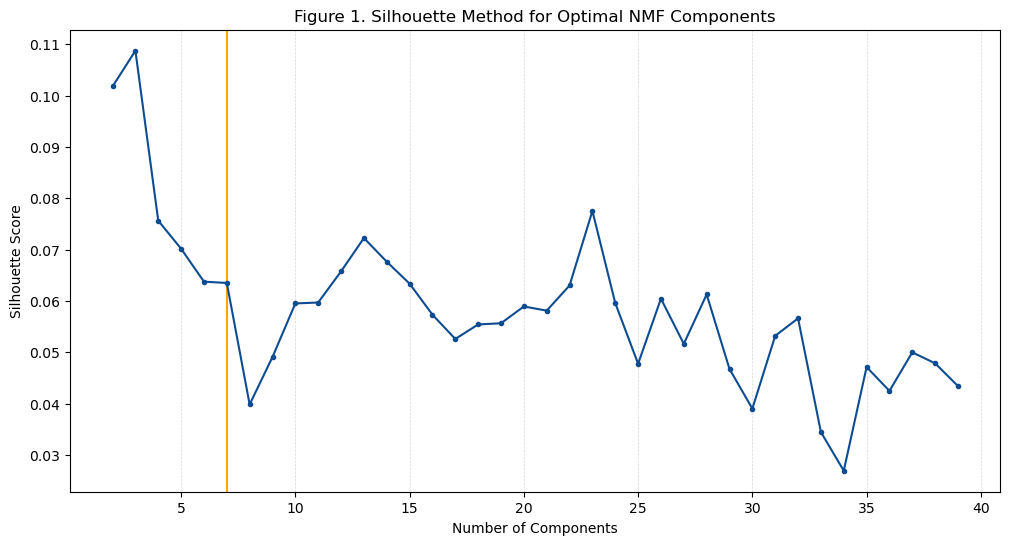

In [12]:
n_components = range(2, 40)
title = 'Figure 1. Silhouette Method for Optimal NMF Components'
silhouette_score_plot(n_components, bow, title)

The data presented in Figure 1 indicates that selecting 7 topics maximizes the silhouette score for NMF components. We select the highest silhouette score in this range as it maintains two attributes - minimum cluster size to ensure that individual clusters are still significant and useful in the recommendation algorithm, and average cluster size as these clusters must separate each group into smaller groups to sufficiently limit the search space.  A score of 0.07 which suggests that the clusters are marginally distinguished from one another. This outcome aligns with the expectations set by the characteristics of the dataset which is highly correlated to one another.

In [13]:
# Dimensionality reduction with NMF
n_topics = 7
nmf = NMF(n_components=n_topics, max_iter=1000, random_state=42)
U = nmf.fit_transform(bow_df)
V = nmf.components_

# Display top terms per topic
top_terms = top_terms_per_cat(V, 20, feature_names_out)
indices = [f'Topic {i+1}' for i in range(n_topics)]
df_terms = pd.DataFrame(data=top_terms, index=indices)
display(Markdown('<center><h5> Table 7. Top Terms by Topic</h4></center>'))
display(HTML(
    f"<center>"
    f"{apply_header_style(df_terms.T).to_html()}"
    f"</center>"))

<center><h5> Table 7. Top Terms by Topic</h4></center>

### B.5 Agglomerative Clustering

Hierarchical clustering using **Ward's linkage** is particularly effective for text data, such as business tags, because it excels in handling high-dimensional spaces that are typical of text data. This method focuses on minimizing the total variance within clusters, which ensures that tags within the same cluster are closely related, even in a sparse and high-dimensional context. Such an approach is adept at uncovering nuanced similarities between tags, capturing deeper thematic or contextual links that might not be immediately apparent. This capability is crucial for text data, where semantic relationships are key, making hierarchical clustering with Ward's linkage a powerful tool for grouping business tags based on their underlying similarities. Additionally, this method does not require pre-specifying the number of clusters, which is beneficial for dealing with the often unknown and varied structure of document data. It produces a hierarchy of clusters that can be insightful for understanding the nuanced relationships between tags at different levels of granularity. Additionally, the dendrogram visualization aids in interpreting the clustering results, making it a comprehensive and intuitive approach for organizing and exploring document-based data.

#### B.5.1 Identify Threshold

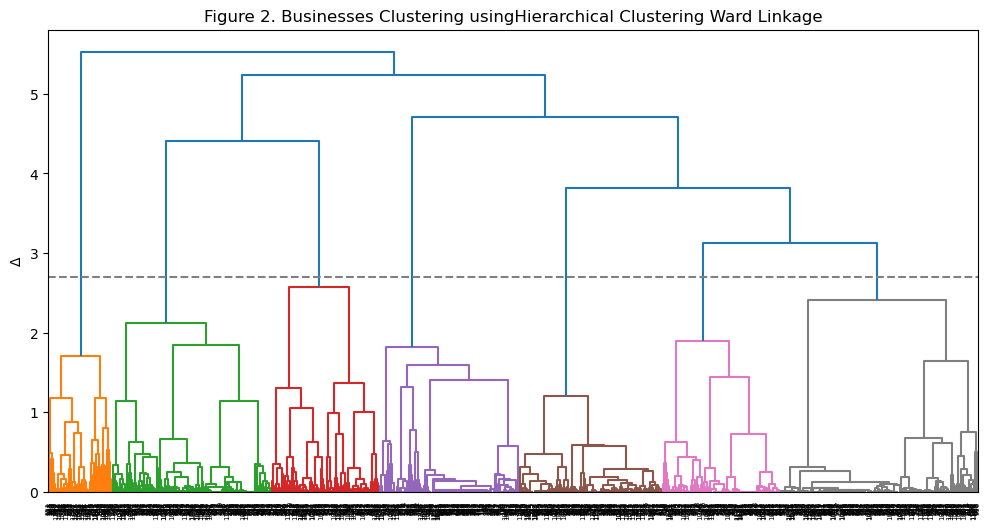

In [14]:
Z = fastcluster.linkage(U, method="ward")
fig, ax = plt.subplots(figsize=(12, 6))
dn = dendrogram(Z, ax=ax, color_threshold=2.7)
ax.set_ylabel(r"$\Delta$")
ax.axhline(y=2.7, color='grey', linestyle='--')
ax.set_title('Figure 2. Businesses Clustering using'
             'Hierarchical Clustering Ward Linkage');

#### B.5.2 Label Business Clusters

In [27]:
labels = fcluster(Z, t=2.7, criterion="distance")
df_restaurants.loc[:, 'label'] = labels

business_samples = dict()
for i in set(labels):
    label_sample = list(df_restaurants.loc[
        df_restaurants.label == i, 'name'][0:12])
    business_samples[f'Business Cluster {i}'] = label_sample

df_business_samples = pd.DataFrame(business_samples)
display(Markdown("<center><h5> Table 8. List of Businesses in the "
                 "Generated Clusters</h4></center>"))
apply_header_style(df_business_samples)

<center><h5> Table 8. List of Businesses in the Generated Clusters</h4></center>

In [28]:
dict_labels = {
    1: 'Events and Catering',
    2: 'Bar and Grill',
    3: 'Breakfast and Brunch',
    4: 'Fast Casual',
    5: 'Fast Food ',
    6: 'Italian',
    7: 'International',
}

df_restaurants['label'] = df_restaurants['label'].replace(dict_labels)

## 
<div style="background-color: #f0f0f0; padding: 10px;">
    <h2 style="color: navy;">C. Identifying User Clusters</h2>


Using the Business ID and Business Cluster mapping from the previous stage, it is now possible to cluster users. Users leave reviews on individual businesses and now that these businesses have been categorized, it is now possible to count the frequency of which a user reviews businesses of a particular category. This reveals his/her consumer habits. Whether or not these reviews are positive or negative is not relevant for the business problem of this project, as a person can be interested in Japanese cuisine but frequently leave negative reviews to Japanese restaurants due to having high standards. The important aspect is identifying the business categories that a user frequents.

### C.1 Data Exploration

In [17]:
df_user_reviews = pd.read_csv('yelp_reviews.txt')
display(Markdown('<center><h5> Table 9. Yelp Review Dataset</h4></center>'))
display(HTML(
    f"<center>"
    f"{apply_header_style(df_user_reviews.head()).to_html()}"
    f"</center>"))

<center><h5> Table 9. Yelp Review Dataset</h4></center>

Yelp user review dataset has 6,990,280 reviews. It will be filtered to business_id in California.

### C.2 Data Cleaning and Preprocessing

#### C.2.1 Nulls and Duplicates

In [18]:
print(df_user_reviews.isnull().any(axis=1).sum())
print(df_user_reviews.duplicated().sum())

0
0


The dataset has no null values and no duplicates.

#### C.2.2 Filter and Merge

In [19]:
# Filter for restaurants in df_restaurants
df_user_reviews = df_user_reviews.loc[
    df_user_reviews['business_id'].isin(df_restaurants.business_id), :]

# Filter for users with at least 5 reviews
user_counts = Counter(df_user_reviews.user_id)
filtered_user_ids = {
    user_id for user_id, count in user_counts.items() if count > 4}

df_user_reviews = df_user_reviews[
    df_user_reviews.user_id.isin(filtered_user_ids)]

# Filter for relevant columns
df_user_reviews = df_user_reviews.loc[:, ['user_id', 'business_id', 'stars']]
df_user_reviews.drop_duplicates(
    subset=['user_id', 'business_id'], inplace=True)

# Merge business cluster labels
df_user_topic = pd.merge(
    df_user_reviews, df_restaurants[['business_id', 'label']],
    how='left', on='business_id')
df_user_topic.rename(
    columns={'label': 'business_cluster'}, inplace=True)

df_user_topic = df_user_topic[['user_id', 'business_cluster']]
display(Markdown("<center><h5> Table 10. User ID with the Assigned Business Cluster"
                 "</h4></center>"))
display(HTML(
    f"<center>"
    f"{apply_header_style(df_user_topic.head(5)).to_html()}"
    f"</center>"))

<center><h5> Table 10. User ID with the Assigned Business Cluster</h4></center>

#### C.2.3 Review Counts

In [20]:
# Get review count by business cluster
df_counts = df_user_topic.pivot_table(
    index='user_id', columns='business_cluster',
    aggfunc='size', fill_value=0)
df_counts.columns.name = None
user_ids = df_counts.index.tolist()
df_counts.reset_index(drop=True, inplace=True)
df_counts_norm = df_counts.div(df_counts.sum(axis=1), axis=0)

display(Markdown('<center><h5> Table 11. Review Count by Business Cluster, '
                 'Normalized per User</h4></center>'))
display(HTML(
    f"<center>"
    f"{apply_header_style(df_counts_norm.head()).to_html()}"
    f"</center>"))

<center><h5> Table 11. Review Count by Business Cluster, Normalized per User</h4></center>

### C.3 Agglomerative Clustering

We then create User clusters from this count vectorization of the Business cluster reviews. These user clusters are created using Ward Linkage and create a variety of user groups that create functional search spaces for the recommender system. Since similarities are used to cluster the user groups, we are also reasonably sure that there would be overlap in reviews for the various users within a single group.

Number of User Clusters: 9


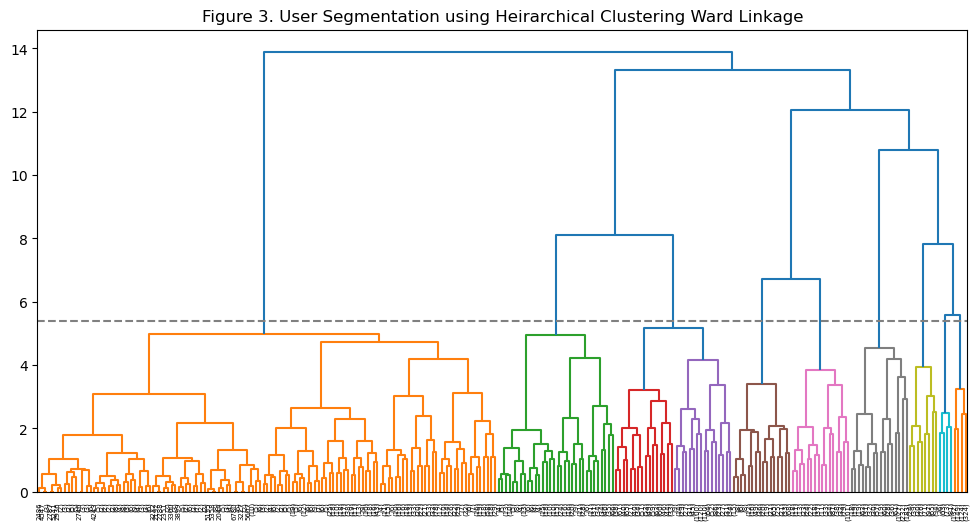

In [21]:
X = df_counts_norm.values
Z = fastcluster.linkage(X, method="ward")
fig, ax = plt.subplots(figsize=(12, 6))
dn = dendrogram(Z, truncate_mode='level', p=7, ax=ax, color_threshold=5)
ax.set_title('Figure 3. User Segmentation using '
             'Heirarchical Clustering Ward Linkage')
ax.axhline(y=5.4, color='grey', linestyle='--')

user_clusters = fcluster(Z, t=5.4, criterion='distance')
print(f'Number of User Clusters: {len(set(user_clusters))}')

## 
<div style="background-color: #f0f0f0; padding: 10px;">
    <h2 style="color: navy;">D. User Cluster Exploratory Data Analysis</h2>
</div>

To translate the vast amount of review data into actionable insights, clustering was applied to identify patterns in user reviews. This analysis revealed the following distinct user segments within the California Yelp dataset:
- **General Diners**: Characterized by a broad range of restaurant preferences and likely encompassing reviews across various cuisines and price points.
- **Brunchers**: Reviews focus heavily on breakfast and lunch spots, potentially with emphasis on weekend dining trends and mention of popular brunch items.
- **Fast Casual Diners**: Reviews prioritize quick-service restaurants with mid-range pricing. Descriptions might include terms like "convenient," "family-friendly," or "value."


- **Diverse**: Exhibits a wide variety of cuisines in their reviews, reflecting an adventurous palate and interest in international food experiences.
- **Travel Foodies**: Reviews likely center around restaurants in tourist destinations or areas with unique culinary reputations. Descriptions might contain place names beyond their immediate locale.
- **Bar Hoppers**: Reviews skew towards bars, pubs, and establishments emphasizing drinks. Descriptors may focus on nightlife, atmosphere, or specific beverage selections.
- **Fast Foodies**: Reviews center heavily on traditional fast-food chains. Look for mentions of convenience, speed, and recognizable brands.
- **Foreign Cuisine Diners**: Exhibits strong preference for a particular non-American cuisine (e.g., Mexican, Japanese, Indian). Reviews may contain cuisine-specific terminology.
- **Italian Enthusiasts**:  Reviews predominantly feature Italian restaurants. Descriptions may include mentions of specific Italian dishes or regional Italian influences.

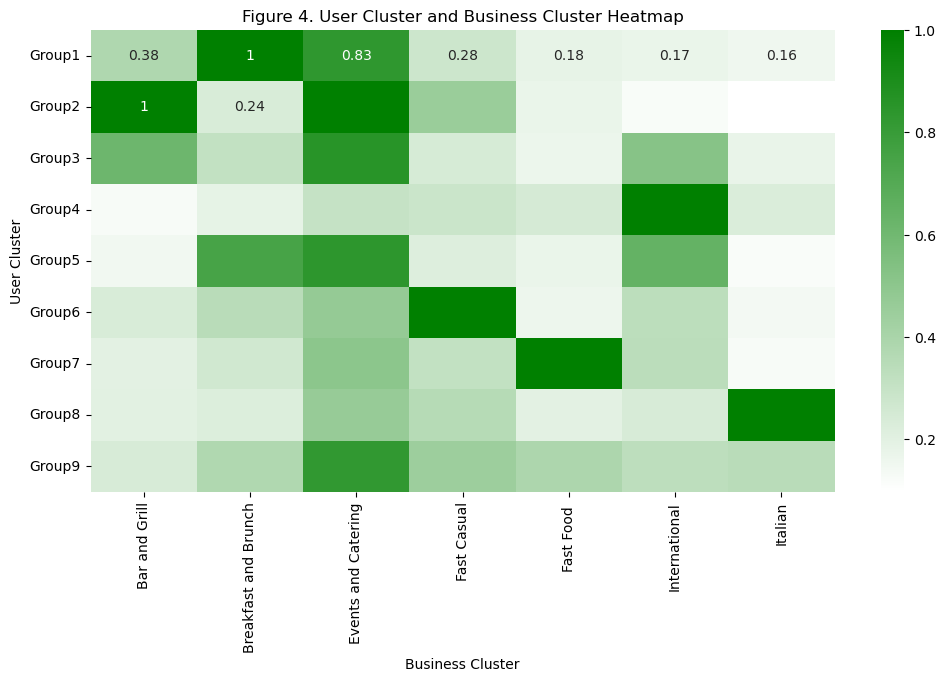

In [22]:
cluster_names = [f'Group{i}' for i in set(user_clusters)]
title = 'Figure 4. User Cluster and Business Cluster Heatmap'
customer_segment_heatmap(
    X, user_clusters, df_counts_norm, cluster_names, title)

Based on Yelp reviews, Figure 4 shows a heatmap representing user and business clusters.  The heatmap uses a color gradient, where darker squares indicate a stronger association between user and business clusters. By clustering users into groups, we aim to identify similar users via agglomerative clustering.  The user groups developed through agglomerative clustering display contrast between other user groups. This should serve as a shortcut when finding similar users later by narrowing the search space when identifying similar users.

In [23]:
dict_labels = {
    1: 'Brunchers',
    2: 'Bar Hoppers',
    3: 'General Diners',
    4: 'Foreign Cuisine Diners',
    5: 'Travel Foodies',
    6: 'Fast Casual Diners',
    7: 'Fast Foodies',
    8: 'Italian Enthusiasts',
    9: 'Diverse',
}

user_clusters_with_names = [dict_labels[i] for i in user_clusters]

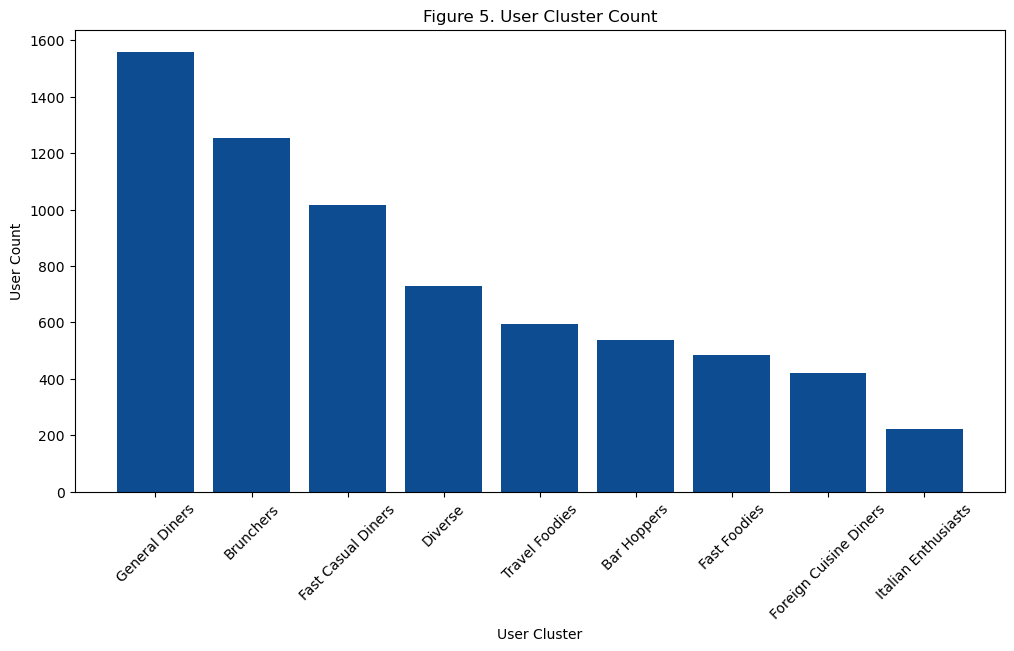

In [24]:
clusters_series = pd.Series(user_clusters_with_names)
cluster_counts = clusters_series.value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))  # Adjust the size as needed
plt.bar(cluster_counts.index, cluster_counts.values, color='#0E4C92')
plt.title('Figure 5. User Cluster Count')
plt.xlabel('User Cluster')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.show()

Figure 5 depicts the number of users within each user cluster. The tallest bar, labeled "General Diners," represents the cluster with the most users (almost 1600). Conversely, bars like "Foreign Cuisine Diners" and "Italian Enthusiasts" appear to represent clusters with a smaller number of users (less than 500 each).

In [25]:
df_user_labels = pd.DataFrame(
    {'user_id': user_ids, 'User_Cluster': user_clusters_with_names})
df_merged = df_user_reviews.merge(
    df_user_labels[['user_id', 'User_Cluster']], on='user_id', how='left')

In [26]:
user_ids, unique_users = pd.factorize(df_merged['user_id'])
df_merged['u_id'] = ['u_{:04d}'.format(i) for i in user_ids]

# Assign new business_id
business_ids, unique_businesses = pd.factorize(df_merged['business_id'])
df_merged['b_id'] = ['r_{:04d}'.format(i) for i in business_ids]

display(Markdown("<center><h5> Table 12. User ID "
                 "with the Assigned User Cluster</h4></center>"))

display(HTML(
    f"<center>"
    f"{apply_header_style(df_merged.head(10)).to_html()}"
    f"</center>"))

<center><h5> Table 12. User ID with the Assigned User Cluster</h4></center>

#
<div style='display: flex; justify-content: space-between; align-items: center; background-color: #08312e; color: white; padding: 6px; width: 100%;'>
    <h3 style='font-weight: bold; font-size: 25px;'>PART 2: Recommendation System Development and Evaluation</h3>
</div>
<div style='height: 3px; background-color: #ff8c00; width: 100%;'>

## 
<div style="background-color: #f0f0f0; padding: 10px;">
    <h2 style="color: navy;">A. Exploratory Data Analysis</h2>
</div>

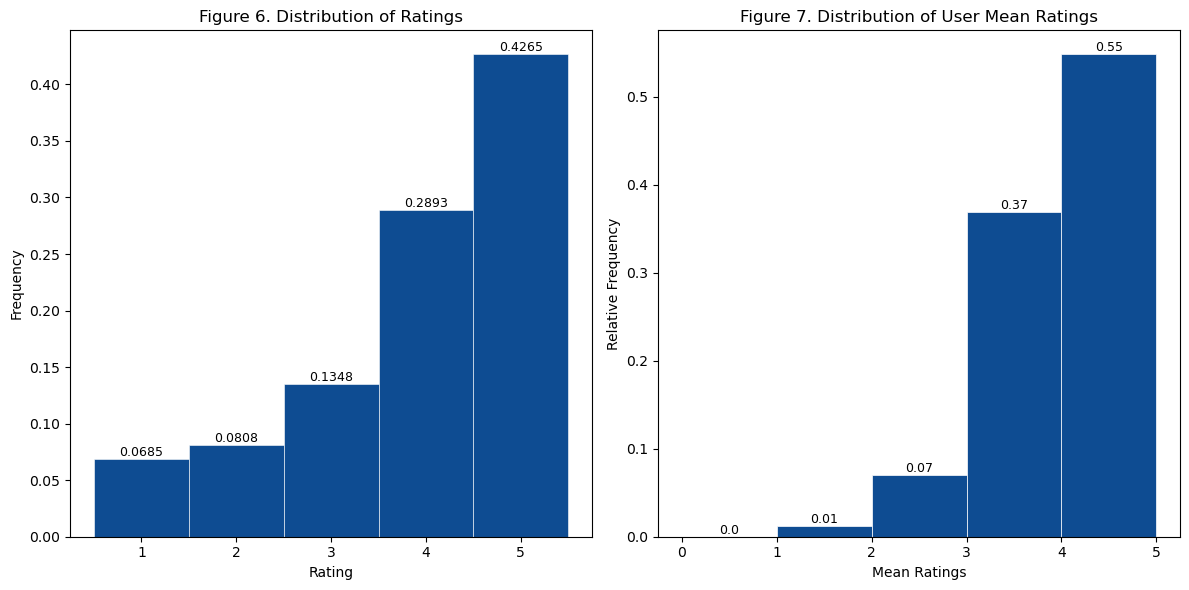

In [29]:
# Create a figure and a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# First graph: Distribution of Ratings
counts, bins, patches = axs[0].hist(
    df_merged.stars, bins=[1, 2, 3, 4, 5, 6], edgecolor='white',
    linewidth=0.4, density=True, align='left', color='#0E4C92')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Figure 6. Distribution of Ratings')
for count, patch in zip(counts, patches):
    axs[0].text(patch.get_x() + patch.get_width() / 2, count,
                f'{round(count, 4)}', ha='center',
                va='bottom', fontsize=9)

# Second graph: Distribution of User Mean Ratings
user_means = df_merged.groupby('u_id')['stars'].mean()
counts, bins, patches = axs[1].hist(
    user_means, bins=[0, 1, 2, 3, 4, 5], edgecolor='white', linewidth=0.5,
    density=True, align='mid', color='#0E4C92')
axs[1].set_xlabel('Mean Ratings')
axs[1].set_ylabel('Relative Frequency')
axs[1].set_title('Figure 7. Distribution of User Mean Ratings')
for count, bin in zip(counts, bins[:-1]):  # Exclude the last bin edge
    axs[1].text(bin + 0.5, count, f'{round(count, 2)}', ha='center',
                va='bottom', fontsize=9)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## 
<div style="background-color: #f0f0f0; padding: 10px;">
    <h2 style="color: navy;">B. Evaluate Algorithms and Approaches</h2>
</div>

In [30]:
def ratings_precision(Predictions, thresh=4):
    """
    Calculate the precision of rating predictions at a specified threshold.

    Parameters:
    - Predictions: A list of prediction objects, each containing the estimated
    rating (est) and the true rating (r_ui).
    - thresh (int, optional): The threshold rating above which a recommendation
    is considered relevant. Default is 4.

    Returns:
    - float: The precision score of the predictions.
    """
    predictions = [0 if i.est < thresh else 1 for i in Predictions]
    actuals = [0 if i.r_ui < thresh else 1 for i in Predictions]
    return precision_score(actuals, predictions)


def dcg_at_k(scores, k=10):
    """
    Compute the Discounted Cumulative Gain (DCG) at K.

    Parameters:
    - scores (list of float): List of relevance scores in the order of
    recommendations.
    - k (int, optional): Number of top recommendations to consider.
    Default is 10.

    Returns:
    - float: The DCG value.
    """
    return sum((2**score - 1) / np.log2(idx + 2) for idx,
               score in enumerate(scores[:k]))


def ndcg_at_k(scores, k=10):
    """
    Compute the Normalized Discounted Cumulative Gain (NDCG) at K.

    Parameters:
    - scores (list of float): List of relevance scores in the order
    of recommendations.
    - k (int, optional): Number of top recommendations to consider.
    Default is 10.

    Returns:
    - float: The NDCG value.
    """
    idcg = dcg_at_k(sorted(scores, reverse=True), k)
    if not idcg:
        return 0
    return dcg_at_k(scores, k) / idcg


def avg_ndcg_at_k(predictions, k=10):
    """
    Calculate the average Normalized Discounted Cumulative Gain (NDCG)
    at K for multiple users.

    Parameters:
    - predictions: A list of tuples, each containing the user id,
    estimated rating, and true rating.
    - k (int, optional): Number of top recommendations to consider for
    each user. Default is 10.

    Returns:
    - float: The average NDCG score for all users.
    """
    # Group predictions by user
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    # Compute average NDCG for all users
    ndcg = np.mean([ndcg_at_k([true_r for (_, true_r)
                               in user_est_true[uid]], k=k)
                    for uid in user_est_true])
    return ndcg

### B.1 Exhaustive Approach

In the Exhaustive Approach, this uses the entirety of the dataset to create the test, train split and utilizes all users as part of the search. It is then solved using three methods; SVD, KNN user, and KNN item representing a Matrix Factorization approach, a collaborative user based filtering, and a collaborative item based filtering. Each is graded based on the precision of the method, the time taken, and the RMSE.

This approach is exhaustive in the search, and is able to maximize the use of the data, so no potential matches are missed. However, it has the flaw of scanning through many users who are very dissimilar to the target for recommendations. A vast majority of users that are cycled through are very distant from the targeted users, but the algorithm needs to go through them completely to identify the top similar users, or in the case of the Matrix Factorization, it adds to the time taken to factor the matrix by adding fields which actually do not contribute to the final user recommendations.

In [31]:
# Prep Data
df_melt = df_merged.loc[:, ['u_id', 'b_id', 'stars']].copy()

# Set Up
reader = Reader(rating_scale=(1, 5))
dataset_full = Dataset.load_from_df(df_melt, reader)
trainset, testset = train_test_split(dataset_full, test_size=0.20)

# Algos
knn_simopts = {'name': 'pearson', 'user_based': True}
knn1_simopts = {'name': 'pearson', 'user_based': False} 
svd = SVD(n_epochs=450, n_factors=250)
knn = KNNWithMeans(k=12, sim_options=knn_simopts, verbose=False)
knn1 = KNNWithMeans(k=10, sim_options=knn1_simopts, verbose=False)


# SVD Results
start_time = time.time()
svd.fit(trainset)
Predictions = svd.test(testset)
svd_time = time.time() - start_time
svd_ndcg = avg_ndcg_at_k(Predictions, k=10)
svd_rmse = accuracy.rmse(Predictions)
svd_precision = ratings_precision(Predictions, thresh=4)
svd_summary = {'Method': 'SVD', 
               'Cluster Pre-Filtering': 'No',
               'Time': svd_time, 
               'Precision': svd_precision,
               'RMSE': svd_rmse,
               'Avg NDCG': svd_ndcg}

# kNN Results (User Based)
start_time = time.time()
knn.fit(trainset)
Predictions = knn.test(testset)
knn_time = time.time() - start_time
knn_ndcg = avg_ndcg_at_k(Predictions, k=10)
knn_rmse = accuracy.rmse(Predictions)
knn_precision = ratings_precision(Predictions, thresh=4)
knn_summary = {'Method': 'KNN User', 
               'Cluster Pre-Filtering': 'No',
               'Time': knn_time, 
               'Precision': knn_precision,
               'RMSE': knn_rmse,
               'Avg NDCG': knn_ndcg}

# kNN Results (Item Based)
start_time = time.time()
knn1.fit(trainset)
Predictions = knn1.test(testset)
knn1_time = time.time() - start_time
knn1_ndcg = avg_ndcg_at_k(Predictions, k=10)
knn1_rmse = accuracy.rmse(Predictions)
knn1_precision = ratings_precision(Predictions, thresh=4)
knn1_summary = {'Method': 'KNN Item', 
                'Cluster Pre-Filtering': 'No',
                'Time': knn1_time, 
                'Precision': knn1_precision,
                'RMSE': knn1_rmse,
                'Avg NDCG': knn1_ndcg}

results = [svd_summary, knn_summary, knn1_summary]

RMSE: 1.0991
RMSE: 1.2138
RMSE: 1.2107


### B.2 Cluster Filtering Approach

The Cluster Filtering approach is to add a prior data filtering step to the exhaustive approach, using the user clusters instead of the entire population in order to reduce the search space while keeping the most relevant users close to one another for the recommendation algorithm. It was found that although User Clusters have a tendency to favor certain kinds of amenities, they are still able to recommend businesses outside the cluster businesses since users in the clusters tend still have coverage in other clusters, creating points of reference for recommendations. The same recommendation systems were used in the Cluster Filtering approach as in the Exhaustive approach.

In [32]:
# Get groups
groups = df_merged['User_Cluster'].unique()
svd_rmses, svd_precisions, svd_times, svd_ndcgs = [], [], [], []
knn_rmses, knn_precisions, knn_times, knn_ndcgs = [], [], [], []
knn1_rmses, knn1_precisions, knn1_times, knn1_ndcgs = [], [], [], []

for group in groups:
    # Prep Data
    df_filtered = df_merged[df_merged.User_Cluster == group]
    df_melt = df_filtered.loc[:, ['u_id', 'b_id', 'stars']].copy()
    dataset_group = Dataset.load_from_df(df_melt, reader)
    trainset, testset = train_test_split(dataset_group, test_size=0.20)

    # SVD Results
    start_time = time.time()
    svd.fit(trainset)
    Predictions = svd.test(testset)
    svd_times.append(time.time() - start_time)
    svd_ndcgs.append(avg_ndcg_at_k(Predictions, k=10))
    svd_rmses.append(accuracy.rmse(Predictions, verbose=False))
    svd_precisions.append(ratings_precision(Predictions, thresh=4))

    # kNN Results (User Based)
    start_time = time.time()
    knn.fit(trainset)
    Predictions = knn.test(testset)
    knn_times.append(time.time() - start_time)
    knn_ndcgs.append(avg_ndcg_at_k(Predictions, k=10))
    knn_rmses.append(accuracy.rmse(Predictions, verbose=False))
    knn_precisions.append(ratings_precision(Predictions, thresh=4))

    # kNN Results (Item Based)
    start_time = time.time()
    knn1.fit(trainset)
    Predictions = knn1.test(testset)
    knn1_times.append(time.time() - start_time)
    knn1_ndcgs.append(avg_ndcg_at_k(Predictions, k=10))
    knn1_rmses.append(accuracy.rmse(Predictions, verbose=False))
    knn1_precisions.append(ratings_precision(Predictions, thresh=4))


svd_time, svd_precision, svd_rmse, svd_ndcg = (np.mean(svd_times),
                                               np.mean(svd_precisions),
                                               np.mean(svd_rmses),
                                               np.mean(svd_ndcgs))
knn_time, knn_precision, knn_rmse, knn_ndcg = (np.mean(knn_times),
                                               np.mean(knn_precisions),
                                               np.mean(knn_rmses),
                                               np.mean(knn_ndcgs))
knn1_time, knn1_precision, knn1_rmse, knn1_ndcg = (np.mean(knn1_times),
                                                   np.mean(knn1_precisions),
                                                   np.mean(knn1_rmses),
                                                   np.mean(knn1_ndcgs))

svd_summary = {'Method': 'SVD',
               'Cluster Pre-Filtering': 'Yes',
               'Time': svd_time,
               'Precision': svd_precision,
               'RMSE': svd_rmse,
               'Avg NDCG': svd_ndcg}
knn_summary = {'Method': 'KNN User',
               'Cluster Pre-Filtering': 'Yes',
               'Time': knn_time,
               'Precision': knn_precision,
               'RMSE': knn_rmse,
               'Avg NDCG': knn_ndcg}
knn1_summary = {'Method': 'KNN Item',
                'Cluster Pre-Filtering': 'Yes',
                'Time': knn1_time,
                'Precision': knn1_precision,
                'RMSE': knn1_rmse,
                'Avg NDCG': knn1_ndcg}

results.extend([svd_summary, knn_summary, knn1_summary])
df_results = pd.DataFrame(results)

In [33]:
df_results.sort_values(by=['Method', 'Cluster Pre-Filtering'],
                       ascending=[False, True],
                       inplace=True)
df_results.reset_index(drop=True, inplace=True)
display(Markdown("<center><h5> Table 13. Exhaustive "
                 "vs Cluster Filtering Approach</h4></center>"))
display(HTML(
    f"<center>"
    f"{apply_header_style(df_results).to_html()}"
    f"</center>"))

<center><h5> Table 13. Exhaustive vs Cluster Filtering Approach</h4></center>

**Algorithm Time Complexity** is a method to estimate the time taken for an algorithm based on input factors and the complexity of the algorithm. Each algorithm takes more time as the amount of data that is in put in increases, and the time complexity gives us the relationship between each input to the total time taken for the algorithm to run. 

Where n is the number of items and m is the number of users, and k is the number of latent factors:

<table>
    <br>
<center> <b>Table 14. Method and Computational Complexity</b> </center>
<center>
  <tr>
    <tr style="background-color: #2e706d; color: white;">
    <th>Method</th>
    <th>Computational Complexity</th>
    </tr>
  </tr>
  <tr>
    <td>Item-Based Collaborative Filtering</td>
    <td>O(n<sup>2</sup> * m)</td>
  </tr>
  <tr>
    <td>User-Based Collaborative Filtering</td>
    <td>O(m<sup>2</sup> * n)</td>
  </tr>
  <tr>
    <td>Latent Factor Collaborative Filtering</td>
    <td>O(k * (m + n) * iterations)</td>
  </tr>
</table>


This shows us that we can reduce the time taken for the algorithm to produce recommendations at least linearly or at best exponentially by decreasing the number of users that the algorithm needs to iterate over, depending on the algorithm.

## 
<div style="background-color: #f0f0f0; padding: 10px;">
    <h2 style="color: navy;">C. Generating Recommmendations</h2>
</div>

In [39]:
uid = 'u_1462'
user_cluster = df_merged[df_merged.u_id == uid].User_Cluster.iloc[0]
df_utility = df_merged.pivot(index='u_id', columns='b_id', values='stars')
user_rating = df_utility.loc[uid][df_utility.loc[uid].notna()].sort_values(
    ascending=False)

restos = user_rating.index.tolist()
resto_ratings = user_rating.tolist()

business_ids = [df_merged.loc[df_merged['b_id'] == r_id, 'business_id'].iloc[0]
                for r_id in restos]

resto_names = [df_restaurants.loc[
    df_restaurants.business_id == b_id, 'name'].iloc[0]
               for b_id in business_ids]

df_resto_ratings = pd.DataFrame(resto_ratings, index=resto_names,
                                columns=['stars'])
display(Markdown(f"<center><h5> Table 15. User {uid} "
                 "Ratings to Different Restaurants</h4></center>"))
display(HTML(
    f"<center>"
    f"{apply_header_style(df_resto_ratings).to_html()}"
    f"</center>"))
display(Markdown(f"<center><h4> User {uid} "
                 f"Cluster Group: {user_cluster}"))

<center><h5> Table 15. User u_1462 Ratings to Different Restaurants</h4></center>

<center><h4> User u_1462 Cluster Group: Italian Enthusiasts

For user u_1462, who is identified as an enthusiast of Italian cuisine, four of her highest-rated restaurants are Italian, including Tino's Italian Grocery, Persona Pizzeria, Rusty's Pizza Parlor, and Pizza Mizza. Lets provide him suggestion from our optimal recommender system.

In [41]:
# Filtered dataset by group
df_filtered = df_merged[df_merged.User_Cluster == user_cluster]
df_utility = df_filtered.pivot(index='u_id', columns='b_id', values='stars')
df_melt = df_utility.reset_index().melt(
    'u_id', var_name='r_id', value_name='rating').dropna()

reader = Reader(rating_scale=(1, 5))

start_time = time.time()
dataset = Dataset.load_from_df(df_melt, reader)
knn = KNNWithMeans(k=12, sim_options=knn_simopts, verbose=False)
knn.fit(dataset.build_full_trainset())

mask = df_utility.loc[uid].isna()
na_iids = df_utility.loc[uid, mask].index
recommendations = []

for iid in na_iids:
    prediction = knn.predict(uid, iid).est
    recommendations.append((iid, prediction))

recommendations = sorted(recommendations, key=lambda x: -x[1])

recommendations = [i[0] for i in recommendations if i[1] > 3]

business_ids = [df_merged.loc[df_merged['b_id'] == b_id,
                              'business_id'].iloc[0]
                for b_id in recommendations][:10]
reco_names = [df_restaurants.loc[df_restaurants.business_id == business_id,
                                 'name'].iloc[0]
              for business_id in business_ids]

run_time = time.time() - start_time

display(f"Recommendation Run Time: {run_time:.4f} seconds")

display(Markdown(f"<center><h5> Table 16. Top 10 Recommendations for "
                 f"user {uid}</h4></center>"))
df_top_recom = apply_header_style(pd.DataFrame(
    reco_names, columns=['Top 10 Recommendations']))
display(HTML(
    f"<center>"
    f"{df_top_recom.to_html()}"
    f"</center>"))

'Recommendation Run Time: 3.3729 seconds'

<center><h5> Table 16. Top 10 Recommendations for user u_1462</h4></center>

For user u_1462, the recommendation system presents a curated selection of pizza establishments offering relevant choices. The inclusion of a ramen and a taco at the bottom of the list indicates that the recommender's scope extends beyond just pizza. This tailored **recommendation system take into account the user’s diverse culinary preferences**, offering not only a specialized focus on pizza but also incorporating top-rated dining options from a wider range of cuisines and users.

## 
<div style="background-color: #f0f0f0; padding: 10px;">
    <h2 style="color: navy;">D. Conclusion</h2>
</div>

By using pre-defined user groups to limit the search space for identifying similar users, the **time to fit a model was reduced by up to 95% without a significant loss of precision or gain in RMSE.** This demonstrates that this is a sound method for improving run-times which is extremely valuable for the user experience. 

The main objective was producing recommendations which a user would enjoy, and the core metrics which reflected this was **precision, which was 81%. NDCG was also high at 94%,** however, this is largely due to the fact that most ratings (in terms of mode) are 5-stars. 

While the ability to accurately predict whether a user would "like" an establishment is the core of the business value, a nice-to-have would be to accurately predict the exact rating itself. However, the admittedly less spectacular RMSE demonstrates a limitation in this regard. Despite this, the approximately **1.2 RMSE value is comparable to other recommender systems.** For example, the RecSys2013: Yelp Business Rating Prediction competition winner had a 1.2 RMSE as well, although their dataset included all users while this project only looked at users with at least 5 ratings. The latest Netflix Prize winner achieved a more impressive RMSE of 0.85, beating the previous winner which had an RMSE of 0.95. This system, however, had the advantage of considering a user's demographic data and other personal information while this project only had access to  historical ratings. Additionally, while the recommender system was demonstratively more accurate, Netflix did not ultimately implement it due to high computational expense. This lends support to this project, which aimed to balance accuracy with speed and practicality.


## 
<div style="background-color: #f0f0f0; padding: 10px;">
    <h2 style="color: navy;">E. Recommendations</h2>
</div>

The strategy of using pre-defined user groups to streamline the recommendation process has proven to be highly effective, significantly boosting efficiency without compromising on accuracy. The system's high precision and NDCG scores are indicative of its ability to deliver recommendations that users find relevant and enjoyable, meeting the main objective effectively. Despite the challenges in predicting exact ratings, as highlighted by the RMSE value, the performance remains competitive with industry benchmarks. This project underscores the importance of balancing precision, efficiency, and practical implementation in the development of recommender systems. By prioritizing speed and user satisfaction, it sets a precedent for future advancements in the field, emphasizing that a strategic approach can achieve excellent outcomes even with limitations on data and computational resources.

Incorporating non-rating related data such as demographic information (age, gender, location, etc.), survey data, and clickstream data (browsing history, interaction patterns, etc.) can significantly enhance the accuracy of a recommender system, particularly in addressing cold-start problems.

Maintaining a regionally varied recommender system with pre-defined clusters requires a focused and adaptive approach to ensure ongoing relevance and accuracy. This involves periodically reassessing clusters to capture changing regional trends and user behaviors. Monitoring each cluster's performance is crucial, using metrics like recommendation accuracy and user engagement to identify when updates or re-clustering are necessary. The system must efficiently incorporate new data and adapt to emerging patterns, ensuring scalability and minimal downtime. A feedback loop where user interactions inform cluster adjustments is essential for aligning recommendations with current preferences. Additionally, understanding cultural and demographic nuances is vital to maintain the system's effectiveness across regions. Implementing automation for routine tasks and alert systems for detecting performance drops can optimize the maintenance process. By continuously refining and updating clusters based on user feedback and changing trends, the recommender system can provide accurate, personalized recommendations across different regions. 


## 
<div style="background-color: #f0f0f0; padding: 10px;">
    <h2 style="color: navy;">E. Appendix</h2>
</div>

### Hyperparameter Tuning

In [93]:
reader = Reader(rating_scale=(1, 5))
results = []

ks = np.arange(2, 31, 2)

# Prep Data
df_melt = df_merged.loc[:, ['u_id', 'b_id', 'stars']].copy()

# Set Up
dataset_full = Dataset.load_from_df(df_melt, reader)

for k in tqdm(ks):
    # Algos
    knn = KNNWithMeans(k=k, sim_options=knn_simopts, verbose=False)
    knn1 = KNNWithMeans(k=k, sim_options=knn1_simopts, verbose=False)

    # kNN Results (user_based)
    knn_results = cross_validate(knn, dataset_full, cv=3, verbose=False)
    knn_rmse = np.mean(knn_results['test_rmse'])
    knn_time = np.mean(knn_results['fit_time'])
    knn_summary = {'k': k,
                   'Method': 'knn-user',
                   'Cluster Pre-Filtering': 'No',
                   'Time': knn_time,
                   'RMSE': knn_rmse}

    # kNN Results (item_based)
    knn1_results = cross_validate(knn1, dataset_full, cv=3, verbose=False)
    knn1_rmse = np.mean(knn1_results['test_rmse'])
    knn1_time = np.mean(knn1_results['fit_time'])
    knn1_summary = {'k': k,
                    'Method': 'knn-item',
                    'Cluster Pre-Filtering': 'No',
                    'Time': knn1_time,
                    'RMSE': knn1_rmse}

    result = [knn_summary, knn1_summary]
    results.extend(result)

df_results = pd.DataFrame(results)

100%|██████████| 15/15 [04:39<00:00, 18.66s/it]


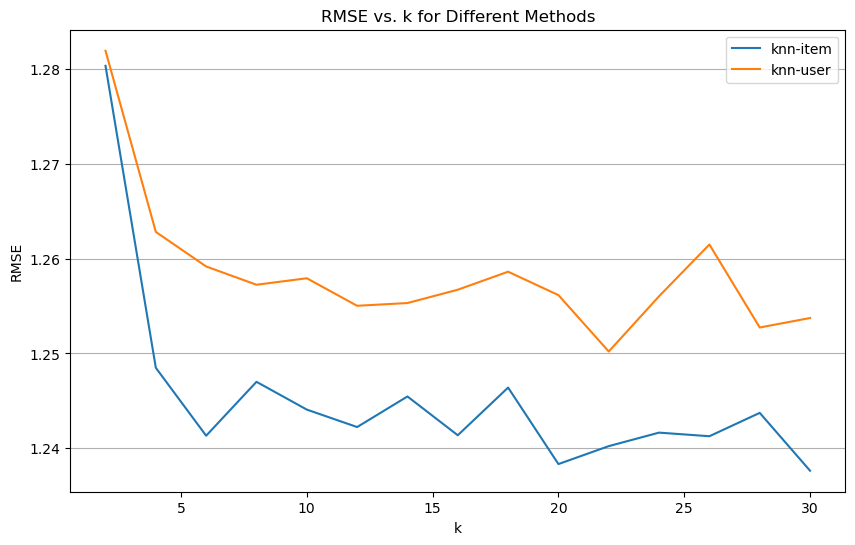

In [94]:
plt.figure(figsize=(10, 6))
for method, group in df_results.groupby('Method'):
    plt.plot(group['k'], group['RMSE'], label=method)

plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE vs. k for Different Methods')
plt.legend()
plt.grid(axis='y')
plt.show()

In [95]:
ns = np.arange(20, 301, 20)

results = []
for n in tqdm(ns):
    # Algos
    svd = SVD(n_epochs=100, n_factors=n)

    # svd Results
    svd_results = cross_validate(
        svd, dataset_full, cv=3, n_jobs=-1, verbose=False)
    svd_rmse = np.mean(svd_results['test_rmse'])
    svd_time = np.mean(svd_results['fit_time'])
    svd_summary = {'n': n,
                   'Method': 'svd',
                   'Cluster Pre-Filtering': 'No',
                   'Time': svd_time,
                   'RMSE': svd_rmse}

    result = [svd_summary]
    results.extend(result)

df_results = pd.DataFrame(results)

100%|██████████| 15/15 [00:51<00:00,  3.43s/it]


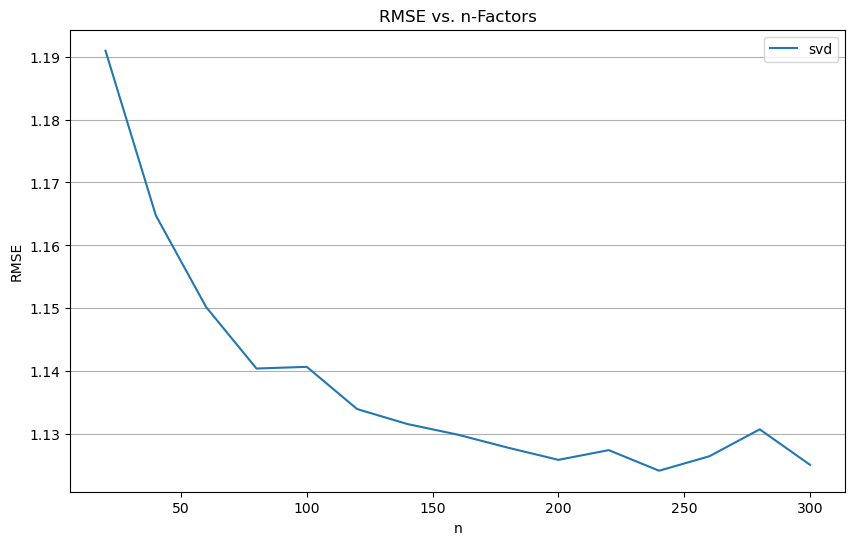

In [96]:
plt.figure(figsize=(10, 6))
for method, group in df_results.groupby('Method'):
    plt.plot(group['n'], group['RMSE'], label=method)

plt.xlabel('n')
plt.ylabel('RMSE')
plt.title('RMSE vs. n-Factors')
plt.legend()
plt.grid(axis='y')
plt.show()

In [97]:
ns = np.arange(50, 501, 50)

results = []
for n in tqdm(ns):
    # Algos
    svd = SVD(n_epochs=n, n_factors=250)

    # svd Results
    svd_result = cross_validate(
        svd, dataset_full, cv=3, n_jobs=-1, verbose=False)
    svd_rmse = np.mean(svd_result['test_rmse'])
    svd_time = np.mean(svd_results['fit_time'])
    svd_summary = {'n': n,
                   'Method': 'svd',
                   'Cluster Pre-Filtering': 'No',
                   'Time': svd_time,
                   'RMSE': svd_rmse}
    result = [svd_summary]
    results.extend(result)

df_results = pd.DataFrame(results)

100%|██████████| 10/10 [01:42<00:00, 10.23s/it]


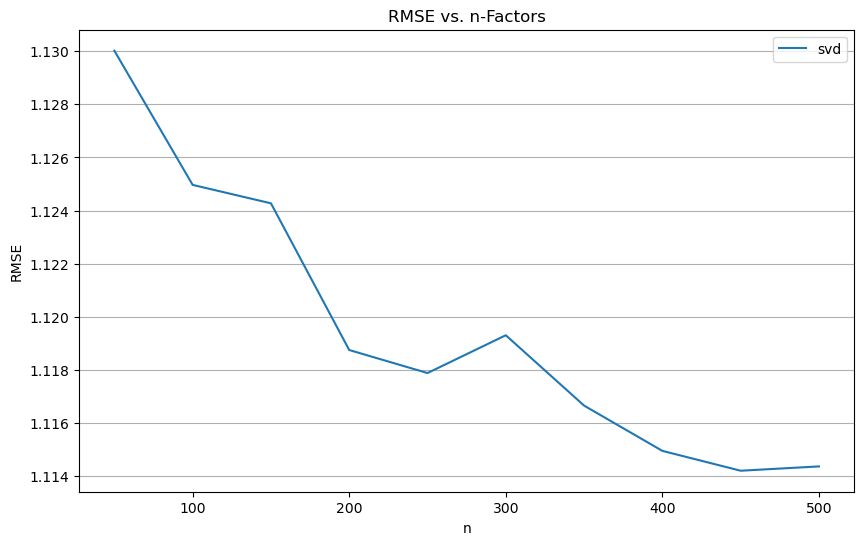

In [98]:
plt.figure(figsize=(10, 6))
for method, group in df_results.groupby('Method'):
    plt.plot(group['n'], group['RMSE'], label=method)

plt.xlabel('n')
plt.ylabel('RMSE')
plt.title('RMSE vs. n-Factors')
plt.legend()
plt.grid(axis='y')
plt.show()

#
<div style='display: flex; justify-content: space-between; align-items: center; background-color: #08312e; color: white; padding: 6px; width: 100%;'>
    <h3 style='font-weight: bold; font-size: 25px;'>REFERENCES</h3>
     <img src="Yelp-Logo-Refresh.gif" style='height: 55px; width: auto; margin-left: auto;'>
</div>
<div style='height: 3px; background-color: #ff8c00; width: 100%;'></div>

1. David, T. (n.d.). Attention span on social media is 2 seconds. Turns out, that’s plenty of time. CareerArc. Retrieved from https://www.careerarc.com/blog/attention-span-on-social-media/
2. Nielsen, J. (1993). Response Times: The 3 Important Limits. Nielsen Norman Group. Retrieved from https://www.nngroup.com/articles/response-times-3-important-limits/